In [1]:
import numpy as np
import gensim
from urllib.request import urlretrieve, urlopen
import gzip
import zipfile

import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from urllib.request import urlretrieve
import zipfile
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

In [7]:
# !pip install cython

In [9]:
# !pip install fasttext

  Using cached fasttext-0.9.2.tar.gz (68 kB)
  Running setup.py clean for fasttext
Failed to build fasttext
    Running setup.py install for fasttext: started
    Running setup.py install for fasttext: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\bitcamp\Anaconda3\envs\nlp\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\bitcamp\\AppData\\Local\\Temp\\pip-install-0aad8f7b\\fasttext_6229de97add749c2b2cc90c0bd9d3a81\\setup.py'"'"'; __file__='"'"'C:\\Users\\bitcamp\\AppData\\Local\\Temp\\pip-install-0aad8f7b\\fasttext_6229de97add749c2b2cc90c0bd9d3a81\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\bitcamp\AppData\Local\Temp\pip-wheel-8r1d86z3'
       cwd: C:\Users\bitcamp\AppData\Local\Temp\pip-install-0aad8f7b\fasttext_6229de97add749c2b2cc90c0bd9d3a81\
  Complete output (20 lines):
  C:\Users\bitcamp\Anaconda3\envs\nlp\lib\site-packages\setuptools\dist.py:720: UserWarning:

In [11]:
# !pip install C:/fasttext/fasttext-0.9.2-cp37-cp37m-win_amd64.whl

Processing c:\fasttext\fasttext-0.9.2-cp37-cp37m-win_amd64.whl


In [2]:
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')

'cc.en.300.bin'

In [4]:
ft = fasttext.load_model('cc.en.300.bin')

In [25]:
embedding_dim = 300
zero_vector = np.zeros(embedding_dim)

# 단어 벡터의 평균으로부터 문장 벡터를 얻는다.
def calculate_sentence_vector(sentence):
    return sum([ft.get_word_vector(word) for word in sentence])/len(sentence)

In [26]:
ft

In [27]:
eng_sent = ['I', 'am', 'a', 'student']
sentence_vector = calculate_sentence_vector(eng_sent)
print(len(sentence_vector))

300


In [33]:
stop_words = stopwords.words('english')

data = pd.read_csv("./investing_cwl/economy/news_economy_00021.csv")
data.head()

,Unnamed: 0,company,date,title,content
0,0,By Reuters,"<span>Aug 19, 2018 03:08PM ET</span>","With recession looming, Argentina's Macri lack...",By Hugh Bronstein\nBUENOS AIRES (Reuters) - Wi...
1,1,By Reuters,"<span>Aug 19, 2018 02:20PM ET</span>","Greece under tight watch post-bailout, can be ...",By George Georgiopoulos\nATHENS (Reuters) - Gr...
2,2,By Bloomberg,"<span>Aug 19, 2018 06:50AM ET</span>",Trade War Won’t Dent China’s GDP,(Bloomberg Opinion) -- Analysts are trying urg...
3,3,By Investing.com,"<span>Aug 19, 2018 05:57AM ET</span>",Economic Calendar - Top 5 Things To Watch This...,Investing.com - Trade talks between the United...
4,4,By Bloomberg,"<span>Aug 19, 2018 04:30AM ET</span>",Tariffs Will Hurt U.S. More Than Rest of World...,(Bloomberg) -- The U.S. economy will be hit ma...


In [34]:

data['sentences'] = data['content'].apply(sent_tokenize)

In [35]:
data

,Unnamed: 0,company,date,title,content,sentences
0,0,By Reuters,"<span>Aug 19, 2018 03:08PM ET</span>","With recession looming, Argentina's Macri lack...",By Hugh Bronstein\nBUENOS AIRES (Reuters) - Wi...,[By Hugh Bronstein\nBUENOS AIRES (Reuters) - W...
1,1,By Reuters,"<span>Aug 19, 2018 02:20PM ET</span>","Greece under tight watch post-bailout, can be ...",By George Georgiopoulos\nATHENS (Reuters) - Gr...,[By George Georgiopoulos\nATHENS (Reuters) - G...
2,2,By Bloomberg,"<span>Aug 19, 2018 06:50AM ET</span>",Trade War Won’t Dent China’s GDP,(Bloomberg Opinion) -- Analysts are trying urg...,[(Bloomberg Opinion) -- Analysts are trying ur...
3,3,By Investing.com,"<span>Aug 19, 2018 05:57AM ET</span>",Economic Calendar - Top 5 Things To Watch This...,Investing.com - Trade talks between the United...,[Investing.com - Trade talks between the Unite...
4,4,By Bloomberg,"<span>Aug 19, 2018 04:30AM ET</span>",Tariffs Will Hurt U.S. More Than Rest of World...,(Bloomberg) -- The U.S. economy will be hit ma...,[(Bloomberg) -- The U.S. economy will be hit m...
...,...,...,...,...,...,...
876,876,By Reuters,"<span>Jul 10, 2018 04:53AM ET</span>",China raises tariff rates for some U.S. optica...,BEIJING (Reuters) - China's commerce ministry ...,[BEIJING (Reuters) - China's commerce ministry...
877,877,By Reuters,"<span>Jul 10, 2018 04:50AM ET</span>",Cuba to prune back private sector as new rules...,HAVANA (Reuters) - Cuba will restrict business...,[HAVANA (Reuters) - Cuba will restrict busines...
878,878,By Reuters,"<span>Jul 10, 2018 03:31AM ET</span>",Switzerland launches WTO action over U.S. stee...,GENEVA (Reuters) - Switzerland has launched a ...,[GENEVA (Reuters) - Switzerland has launched a...
879,879,By Reuters,"<span>Jul 10, 2018 02:50AM ET</span>",Europe needs pan-European banks: JPMorgan's Di...,"MILAN (Reuters) - Europe needs larger, stronge...","[MILAN (Reuters) - Europe needs larger, strong..."


In [36]:
# 토큰화 함수
def tokenization(sentences):
    return [word_tokenize(sentence) for sentence in sentences]

# 전처리 함수
def preprocess_sentence(sentence):
  # 영어를 제외한 숫자, 특수 문자 등은 전부 제거. 모든 알파벳은 소문자화
  sentence = [re.sub(r'[^a-zA-z\s]', '', word).lower() for word in sentence]
  # 불용어가 아니면서 단어가 실제로 존재해야 한다.
  return [word for word in sentence if word not in stop_words and word]

# 위 전처리 함수를 모든 문장에 대해서 수행. 이 함수를 호출하면 모든 행에 대해서 수행.
def preprocess_sentences(sentences):
    return [preprocess_sentence(sentence) for sentence in sentences] 

In [37]:
data['tokenized_sentences'] = data['sentences'].apply(tokenization)
data['tokenized_sentences'] = data['tokenized_sentences'].apply(preprocess_sentences)
data

,Unnamed: 0,company,date,title,content,sentences,tokenized_sentences
0,0,By Reuters,"<span>Aug 19, 2018 03:08PM ET</span>","With recession looming, Argentina's Macri lack...",By Hugh Bronstein\nBUENOS AIRES (Reuters) - Wi...,[By Hugh Bronstein\nBUENOS AIRES (Reuters) - W...,"[[hugh, bronstein, buenos, aires, reuters, int..."
1,1,By Reuters,"<span>Aug 19, 2018 02:20PM ET</span>","Greece under tight watch post-bailout, can be ...",By George Georgiopoulos\nATHENS (Reuters) - Gr...,[By George Georgiopoulos\nATHENS (Reuters) - G...,"[[george, georgiopoulos, athens, reuters, gree..."
2,2,By Bloomberg,"<span>Aug 19, 2018 06:50AM ET</span>",Trade War Won’t Dent China’s GDP,(Bloomberg Opinion) -- Analysts are trying urg...,[(Bloomberg Opinion) -- Analysts are trying ur...,"[[bloomberg, opinion, analysts, trying, urgent..."
3,3,By Investing.com,"<span>Aug 19, 2018 05:57AM ET</span>",Economic Calendar - Top 5 Things To Watch This...,Investing.com - Trade talks between the United...,[Investing.com - Trade talks between the Unite...,"[[investingcom, trade, talks, united, states, ..."
4,4,By Bloomberg,"<span>Aug 19, 2018 04:30AM ET</span>",Tariffs Will Hurt U.S. More Than Rest of World...,(Bloomberg) -- The U.S. economy will be hit ma...,[(Bloomberg) -- The U.S. economy will be hit m...,"[[bloomberg, us, economy, hit, many, times, ha..."
...,...,...,...,...,...,...,...
876,876,By Reuters,"<span>Jul 10, 2018 04:53AM ET</span>",China raises tariff rates for some U.S. optica...,BEIJING (Reuters) - China's commerce ministry ...,[BEIJING (Reuters) - China's commerce ministry...,"[[beijing, reuters, china, commerce, ministry,..."
877,877,By Reuters,"<span>Jul 10, 2018 04:50AM ET</span>",Cuba to prune back private sector as new rules...,HAVANA (Reuters) - Cuba will restrict business...,[HAVANA (Reuters) - Cuba will restrict busines...,"[[havana, reuters, cuba, restrict, business, l..."
878,878,By Reuters,"<span>Jul 10, 2018 03:31AM ET</span>",Switzerland launches WTO action over U.S. stee...,GENEVA (Reuters) - Switzerland has launched a ...,[GENEVA (Reuters) - Switzerland has launched a...,"[[geneva, reuters, switzerland, launched, comp..."
879,879,By Reuters,"<span>Jul 10, 2018 02:50AM ET</span>",Europe needs pan-European banks: JPMorgan's Di...,"MILAN (Reuters) - Europe needs larger, stronge...","[MILAN (Reuters) - Europe needs larger, strong...","[[milan, reuters, europe, needs, larger, stron..."


In [38]:
embedding_dim = 300
zero_vector = np.zeros(embedding_dim)

In [43]:
# 단어 벡터의 평균으로부터 문장 벡터를 얻는다.
def calculate_sentence_vector(sentence):
  if len(sentence) != 0:
    return sum([ft.get_word_vector(word) for word in sentence])/len(sentence)
  else:
    return zero_vector

In [44]:
# 각 문장에 대해서 문장 벡터를 반환
def sentences_to_vectors(sentences):
    return [calculate_sentence_vector(sentence) 
              for sentence in sentences]

In [45]:
data['SentenceEmbedding'] = data['tokenized_sentences'].apply(sentences_to_vectors)
data[['SentenceEmbedding']]

,SentenceEmbedding
0,"[[-0.01881426, 0.0053419895, -0.016177956, 0.0..."
1,"[[-0.016974207, 0.009708023, 0.007609666, 0.03..."
2,"[[-0.039504163, 0.0052812, 0.03121076, 0.05072..."
3,"[[-0.025408262, 0.021058518, 0.03049918, 0.061..."
4,"[[-0.011106198, -0.026156165, -0.00495136, 0.0..."
...,...
876,"[[-0.036203574, 0.028883401, -0.010354614, 0.0..."
877,"[[-0.04613678, 0.00032354431, -0.0074015493, 0..."
878,"[[-0.018769467, 0.0022256174, -0.004874072, 0...."
879,"[[-0.0035536867, -0.045377485, -0.036101896, 0..."


In [46]:
def similarity_matrix(sentence_embedding):
  sim_mat = np.zeros([len(sentence_embedding), len(sentence_embedding)])
  for i in range(len(sentence_embedding)):
      for j in range(len(sentence_embedding)):
        sim_mat[i][j] = cosine_similarity(sentence_embedding[i].reshape(1, embedding_dim),
                                          sentence_embedding[j].reshape(1, embedding_dim))[0,0]
  return sim_mat

In [47]:
data['SimMatrix'] = data['SentenceEmbedding'].apply(similarity_matrix)
data['SimMatrix']

0      [[1.0000001192092896, 0.8000097870826721, 0.72...
1      [[0.9999998807907104, 0.7317458391189575, 0.63...
2      [[1.0, 0.5933828353881836, 0.6079122424125671,...
3      [[1.0, 0.7658512592315674, 0.6884312033653259,...
4      [[0.9999999403953552, 0.045549336820840836, 0....
                             ...                        
876    [[0.9999999403953552, 0.6278504133224487, 0.60...
877    [[1.0, 0.6956280469894409, 0.7812337279319763,...
878    [[0.9999999403953552, 0.8050974607467651, 0.67...
879    [[1.0000001192092896, 0.6245397925376892, 0.42...
880    [[1.0000001192092896, 0.641340434551239, 0.691...
Name: SimMatrix, Length: 881, dtype: object

In [48]:
print('두번째 샘플의 문장 개수 :',len(data['tokenized_sentences'][1]))
print('두번째 샘플의 문장 벡터가 모인 문장 행렬의 크기(shape) :',np.shape(data['SentenceEmbedding'][1]))
print('두번째 샘플의 유사도 행렬의 크기(shape) :',data['SimMatrix'][1].shape)

두번째 샘플의 문장 개수 : 20
두번째 샘플의 문장 벡터가 모인 문장 행렬의 크기(shape) : (20, 300)
두번째 샘플의 유사도 행렬의 크기(shape) : (20, 20)


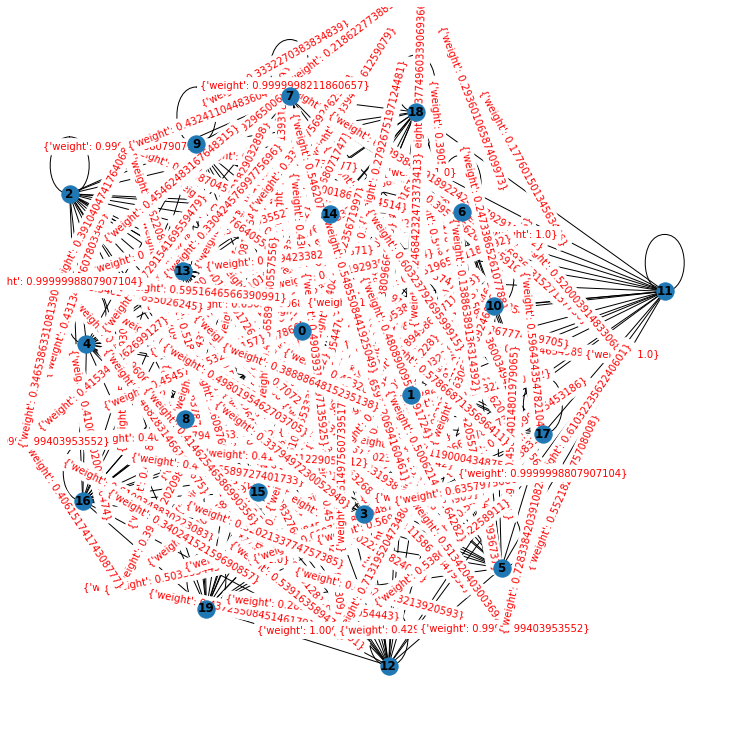

In [49]:
def draw_graphs(sim_matrix):
  nx_graph = nx.from_numpy_array(sim_matrix)
  plt.figure(figsize=(10, 10))
  pos = nx.spring_layout(nx_graph)
  nx.draw(nx_graph, with_labels=True, font_weight='bold')
  nx.draw_networkx_edge_labels(nx_graph,pos,font_color='red')
  plt.show()
    
draw_graphs(data['SimMatrix'][1])

In [52]:
def calculate_score(sim_matrix):
    nx_graph = nx.from_numpy_array(sim_matrix)
    scores = nx.pagerank(nx_graph)
    return scores

data['score'] = data['SimMatrix'].apply(calculate_score)
data[['SimMatrix', 'score']]

,SimMatrix,score
0,"[[1.0000001192092896, 0.8000097870826721, 0.72...","{0: 0.025604973523980768, 1: 0.026536713474408..."
1,"[[0.9999998807907104, 0.7317458391189575, 0.63...","{0: 0.0583613282606816, 1: 0.05351509657464281..."
2,"[[1.0, 0.5933828353881836, 0.6079122424125671,...","{0: 0.032374202308469435, 1: 0.033542420637213..."
3,"[[1.0, 0.7658512592315674, 0.6884312033653259,...","{0: 0.029360932506722677, 1: 0.027587923845583..."
4,"[[0.9999999403953552, 0.045549336820840836, 0....","{0: 0.08370942334208666, 1: 0.0355182278416883..."
...,...,...
876,"[[0.9999999403953552, 0.6278504133224487, 0.60...","{0: 0.33612012931212254, 1: 0.3331323631145509..."
877,"[[1.0, 0.6956280469894409, 0.7812337279319763,...","{0: 0.06354189925804161, 1: 0.0569982584168319..."
878,"[[0.9999999403953552, 0.8050974607467651, 0.67...","{0: 0.2588418009717443, 1: 0.24505047877799777..."
879,"[[1.0000001192092896, 0.6245397925376892, 0.42...","{0: 0.18360578707174924, 1: 0.2055675962998370..."


In [53]:
data['score'][1]

{0: 0.0583613282606816,
 1: 0.05351509657464281,
 2: 0.046452087182440045,
 3: 0.054324197562280775,
 4: 0.053095937907876256,
 5: 0.04374042371534994,
 6: 0.04622862695406812,
 7: 0.053852972857926826,
 8: 0.05556151995210478,
 9: 0.05387811441303755,
 10: 0.05521933751183465,
 11: 0.03368727148188956,
 12: 0.04132694912993404,
 13: 0.050390508585783804,
 14: 0.05565848634492184,
 15: 0.056989102646602244,
 16: 0.0459455086184778,
 17: 0.04399189577780176,
 18: 0.05148421654941276,
 19: 0.04629641797293274}

In [54]:
def ranked_sentences(sentences, scores, n=3):
    top_scores = sorted(((scores[i],s) 
                         for i,s in enumerate(sentences)), 
                                reverse=True)
    top_n_sentences = [sentence 
                        for score,sentence in top_scores[:n]]
    return " ".join(top_n_sentences)

In [55]:
data['summary'] = data.apply(lambda x: 
                            ranked_sentences(x.sentences, 
                            x.score), axis=1)

In [58]:
data

,Unnamed: 0,company,date,title,content,sentences,tokenized_sentences,SentenceEmbedding,SimMatrix,score,summary
0,0,By Reuters,"<span>Aug 19, 2018 03:08PM ET</span>","With recession looming, Argentina's Macri lack...",By Hugh Bronstein\nBUENOS AIRES (Reuters) - Wi...,[By Hugh Bronstein\nBUENOS AIRES (Reuters) - W...,"[[hugh, bronstein, buenos, aires, reuters, int...","[[-0.01881426, 0.0053419895, -0.016177956, 0.0...","[[1.0000001192092896, 0.8000097870826721, 0.72...","{0: 0.025604973523980768, 1: 0.026536713474408...",Argentina's central bank hiked interest rates ...
1,1,By Reuters,"<span>Aug 19, 2018 02:20PM ET</span>","Greece under tight watch post-bailout, can be ...",By George Georgiopoulos\nATHENS (Reuters) - Gr...,[By George Georgiopoulos\nATHENS (Reuters) - G...,"[[george, georgiopoulos, athens, reuters, gree...","[[-0.016974207, 0.009708023, 0.007609666, 0.03...","[[0.9999998807907104, 0.7317458391189575, 0.63...","{0: 0.0583613282606816, 1: 0.05351509657464281...",By George Georgiopoulos\nATHENS (Reuters) - Gr...
2,2,By Bloomberg,"<span>Aug 19, 2018 06:50AM ET</span>",Trade War Won’t Dent China’s GDP,(Bloomberg Opinion) -- Analysts are trying urg...,[(Bloomberg Opinion) -- Analysts are trying ur...,"[[bloomberg, opinion, analysts, trying, urgent...","[[-0.039504163, 0.0052812, 0.03121076, 0.05072...","[[1.0, 0.5933828353881836, 0.6079122424125671,...","{0: 0.032374202308469435, 1: 0.033542420637213...","If, as is widely acknowledged even by the gove..."
3,3,By Investing.com,"<span>Aug 19, 2018 05:57AM ET</span>",Economic Calendar - Top 5 Things To Watch This...,Investing.com - Trade talks between the United...,[Investing.com - Trade talks between the Unite...,"[[investingcom, trade, talks, united, states, ...","[[-0.025408262, 0.021058518, 0.03049918, 0.061...","[[1.0, 0.7658512592315674, 0.6884312033653259,...","{0: 0.029360932506722677, 1: 0.027587923845583...","On the data front, a report on U.S. durable go..."
4,4,By Bloomberg,"<span>Aug 19, 2018 04:30AM ET</span>",Tariffs Will Hurt U.S. More Than Rest of World...,(Bloomberg) -- The U.S. economy will be hit ma...,[(Bloomberg) -- The U.S. economy will be hit m...,"[[bloomberg, us, economy, hit, many, times, ha...","[[-0.011106198, -0.026156165, -0.00495136, 0.0...","[[0.9999999403953552, 0.045549336820840836, 0....","{0: 0.08370942334208666, 1: 0.0355182278416883...","Soren Skou, who runs the world’s biggest shipp..."
...,...,...,...,...,...,...,...,...,...,...,...
876,876,By Reuters,"<span>Jul 10, 2018 04:53AM ET</span>",China raises tariff rates for some U.S. optica...,BEIJING (Reuters) - China's commerce ministry ...,[BEIJING (Reuters) - China's commerce ministry...,"[[beijing, reuters, china, commerce, ministry,...","[[-0.036203574, 0.028883401, -0.010354614, 0.0...","[[0.9999999403953552, 0.6278504133224487, 0.60...","{0: 0.33612012931212254, 1: 0.3331323631145509...",BEIJING (Reuters) - China's commerce ministry ...
877,877,By Reuters,"<span>Jul 10, 2018 04:50AM ET</span>",Cuba to prune back private sector as new rules...,HAVANA (Reuters) - Cuba will restrict business...,[HAVANA (Reuters) - Cuba will restrict busines...,"[[havana, reuters, cuba, restrict, business, l...","[[-0.04613678, 0.00032354431, -0.0074015493, 0...","[[1.0, 0.6956280469894409, 0.7812337279319763,...","{0: 0.06354189925804161, 1: 0.0569982584168319...",HAVANA (Reuters) - Cuba will restrict business...
878,878,By Reuters,"<span>Jul 10, 2018 03:31AM ET</span>",Switzerland launches WTO action over U.S. stee...,GENEVA (Reuters) - Switzerland has launched a ...,[GENEVA (Reuters) - Switzerland has launched a...,"[[geneva, reuters, switzerland, launched, comp...","[[-0.018769467, 0.0022256174, -0.004874072, 0....","[[0.9999999403953552, 0.8050974607467651, 0.67...","{0: 0.2588418009717443, 1: 0.24505047877799777...",GENEVA (Reuters) - Switzerland has launched a ...
879,879,By Reuters,"<span>Jul 10, 2018 02:50AM ET</span>",Europe needs pan-European banks: JPMorgan's Di...,"MILAN (Reuters) - Eur

In [59]:
for i in range(0, len(data)):
    print(i+1,'번 문서')
    print('원문 :',data.loc[i].content)
    print('')
    print('요약 :',data.loc[i].summary)
    print('')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [60]:
print('원문 : ', data.content[0])
print('요약 : ', data.summary[0])
print('='*100)

원문 :  By Hugh Bronstein
BUENOS AIRES (Reuters) - With interest rates sky-high and the economy heading for recession, Argentina's President Mauricio Macri is running short of options to stem a slide in the peso, economists say, leaving the battered currency at the mercy of volatility in emerging markets.
Macri's government has already taken a series of measures to restore confidence in the peso since it came under pressure in May, reviving memories of a painful 2002 economic crisis in Latin America's third-largest economy. 
The peso, which has fallen around 40 percent so far this year, rivals the Turkish lira as the world's worst performing currency in 2018. 
Argentina's central bank hiked interest rates to 40 percent in May, and Macri sealed a $50-billion deal with the International Monetary Fund in June - removing the need for outside funding and briefly steadying the peso. His government has since announced more than $2 billion in budget savings. 
But jitters returned in recent weeks

In [70]:
for i in data.index[:10]:
    print('원문 : ', data.content[i])
    print('-'*100)
    print('요약 : ', data.summary[i])
    print('='*100)

원문 :  By Hugh Bronstein
BUENOS AIRES (Reuters) - With interest rates sky-high and the economy heading for recession, Argentina's President Mauricio Macri is running short of options to stem a slide in the peso, economists say, leaving the battered currency at the mercy of volatility in emerging markets.
Macri's government has already taken a series of measures to restore confidence in the peso since it came under pressure in May, reviving memories of a painful 2002 economic crisis in Latin America's third-largest economy. 
The peso, which has fallen around 40 percent so far this year, rivals the Turkish lira as the world's worst performing currency in 2018. 
Argentina's central bank hiked interest rates to 40 percent in May, and Macri sealed a $50-billion deal with the International Monetary Fund in June - removing the need for outside funding and briefly steadying the peso. His government has since announced more than $2 billion in budget savings. 
But jitters returned in recent weeks

In [2]:
import fasttext.util
fasttext.util.download_model('en', if_exists='ignore')

'cc.en.300.bin'

In [3]:
ft = fasttext.load_model('cc.en.300.bin')

embedding_dim = 300
zero_vector = np.zeros(embedding_dim)

# 단어 벡터의 평균으로부터 문장 벡터를 얻는다.
def calculate_sentence_vector(sentence):
    return sum([ft.get_word_vector(word) for word in sentence])/len(sentence)

stop_words = stopwords.words('english')

data = pd.read_csv("./investing_cwl/economy/news_economy_00021.csv")

data['sentences'] = data['content'].apply(sent_tokenize)

# 토큰화 함수
def tokenization(sentences):
    return [word_tokenize(sentence) for sentence in sentences]

# 전처리 함수
def preprocess_sentence(sentence):
  # 영어를 제외한 숫자, 특수 문자 등은 전부 제거. 모든 알파벳은 소문자화
  sentence = [re.sub(r'[^a-zA-z\s]', '', word).lower() for word in sentence]
  # 불용어가 아니면서 단어가 실제로 존재해야 한다.
  return [word for word in sentence if word not in stop_words and word]

# 위 전처리 함수를 모든 문장에 대해서 수행. 이 함수를 호출하면 모든 행에 대해서 수행.
def preprocess_sentences(sentences):
    return [preprocess_sentence(sentence) for sentence in sentences] 

data['tokenized_sentences'] = data['sentences'].apply(tokenization)
data['tokenized_sentences'] = data['tokenized_sentences'].apply(preprocess_sentences)

embedding_dim = 300
zero_vector = np.zeros(embedding_dim)

# 단어 벡터의 평균으로부터 문장 벡터를 얻는다.
def calculate_sentence_vector(sentence):
    if len(sentence) != 0:
        return sum([ft.get_word_vector(word) for word in sentence])/len(sentence)
    else:
        return zero_vector


# 각 문장에 대해서 문장 벡터를 반환
def sentences_to_vectors(sentences):
    return [calculate_sentence_vector(sentence) 
              for sentence in sentences]

data['SentenceEmbedding'] = data['tokenized_sentences'].apply(sentences_to_vectors)

def similarity_matrix(sentence_embedding):
    sim_mat = np.zeros([len(sentence_embedding), len(sentence_embedding)])
    for i in range(len(sentence_embedding)):
        for j in range(len(sentence_embedding)):
            sim_mat[i][j] = cosine_similarity(sentence_embedding[i].reshape(1, embedding_dim),
                                          sentence_embedding[j].reshape(1, embedding_dim))[0,0]
    return sim_mat

data['SimMatrix'] = data['SentenceEmbedding'].apply(similarity_matrix)

# 그래프

def calculate_score(sim_matrix):
    nx_graph = nx.from_numpy_array(sim_matrix)
    scores = nx.pagerank(nx_graph)
    return scores

data['score'] = data['SimMatrix'].apply(calculate_score)
data[['SimMatrix', 'score']]

def ranked_sentences(sentences, scores, n=3):
    top_scores = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)
    top_n_sentences = [sentence for score,sentence in top_scores[:n]]
    return " ".join(top_n_sentences)


data['summary'] = data.apply(lambda x: ranked_sentences(x.sentences, x.score), axis=1)




In [9]:
print(data[['summary']])

                                               summary
0    Argentina's central bank hiked interest rates ...
1    By George Georgiopoulos\nATHENS (Reuters) - Gr...
2    If, as is widely acknowledged even by the gove...
3    On the data front, a report on U.S. durable go...
4    Soren Skou, who runs the world’s biggest shipp...
..                                                 ...
876  BEIJING (Reuters) - China's commerce ministry ...
877  HAVANA (Reuters) - Cuba will restrict business...
878  GENEVA (Reuters) - Switzerland has launched a ...
879  "I think that Brexit will ultimately have very...
880  By Charlotte Greenfield\nWELLINGTON (Reuters) ...

[881 rows x 1 columns]


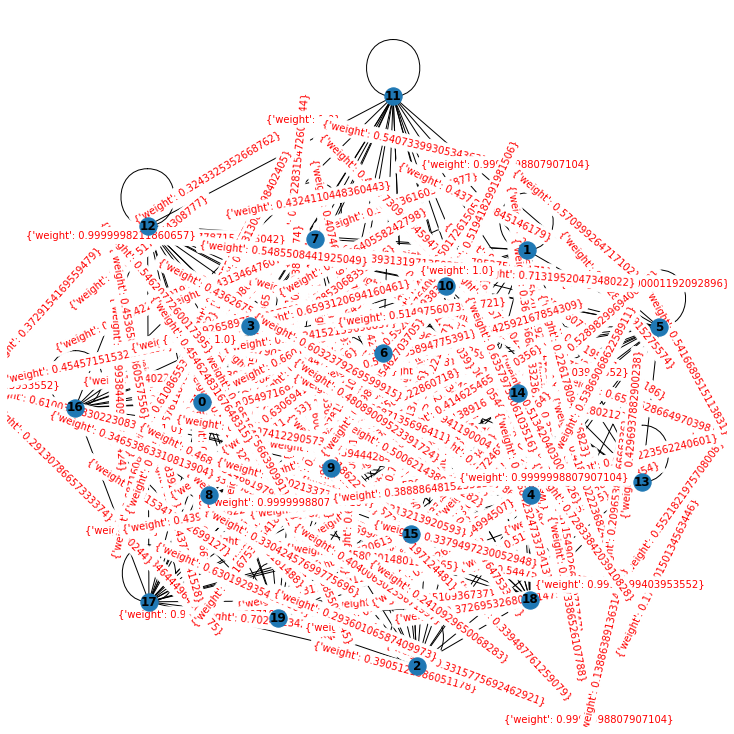

In [12]:
def draw_graphs(sim_matrix):
    nx_graph = nx.from_numpy_array(sim_matrix)
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(nx_graph)
    nx.draw(nx_graph, with_labels=True, font_weight='bold')
    nx.draw_networkx_edge_labels(nx_graph,pos,font_color='red')
    plt.show()
    
draw_graphs(data['SimMatrix'][1])

In [3]:
ft = fasttext.load_model('cc.en.300.bin')

embedding_dim = 300
zero_vector = np.zeros(embedding_dim)


# 토큰화 함수
def tokenization(sentences):
    return [word_tokenize(sentence) for sentence in sentences]

# 전처리 함수
def preprocess_sentence(sentence):
  # 영어를 제외한 숫자, 특수 문자 등은 전부 제거. 모든 알파벳은 소문자화
  sentence = [re.sub(r'[^a-zA-z\s]', '', word).lower() for word in sentence]
  # 불용어가 아니면서 단어가 실제로 존재해야 한다.
  return [word for word in sentence if word not in stop_words and word]

# 위 전처리 함수를 모든 문장에 대해서 수행. 이 함수를 호출하면 모든 행에 대해서 수행.
def preprocess_sentences(sentences):
    return [preprocess_sentence(sentence) for sentence in sentences] 

# 단어 벡터의 평균으로부터 문장 벡터를 얻는다.
def calculate_sentence_vector(sentence):
    if len(sentence) != 0:
        return sum([ft.get_word_vector(word) for word in sentence])/len(sentence)
    else:
        return zero_vector


# 각 문장에 대해서 문장 벡터를 반환
def sentences_to_vectors(sentences):
    return [calculate_sentence_vector(sentence) for sentence in sentences]


def similarity_matrix(sentence_embedding):
    sim_mat = np.zeros([len(sentence_embedding), len(sentence_embedding)])
    for i in range(len(sentence_embedding)):
        for j in range(len(sentence_embedding)):
            sim_mat[i][j] = cosine_similarity(sentence_embedding[i].reshape(1, embedding_dim),
                                          sentence_embedding[j].reshape(1, embedding_dim))[0,0]
    return sim_mat


def calculate_score(sim_matrix):
    nx_graph = nx.from_numpy_array(sim_matrix)
    scores = nx.pagerank(nx_graph)
    return scores


def ranked_sentences(sentences, scores, n=3):
    top_scores = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)
    top_n_sentences = [sentence for score,sentence in top_scores[:n]]
    return " ".join(top_n_sentences)




stop_words = stopwords.words('english')

data = pd.read_csv("./investing_cwl/economy/news_economy_00021.csv")

data['sentences'] = data['content'].apply(sent_tokenize)


data['tokenized_sentences'] = data['sentences'].apply(tokenization)    # 토큰화 함수
data['tokenized_sentences'] = data['tokenized_sentences'].apply(preprocess_sentences)   # 위 전처리 함수를 모든 문장에 대해서 수행


data['SentenceEmbedding'] = data['tokenized_sentences'].apply(sentences_to_vectors)  # 각 문장에 대해서 문장 벡터를 반환


data['SimMatrix'] = data['SentenceEmbedding'].apply(similarity_matrix)


data['score'] = data['SimMatrix'].apply(calculate_score)


data['summary'] = data.apply(lambda x: ranked_sentences(x.sentences, x.score), axis=1)




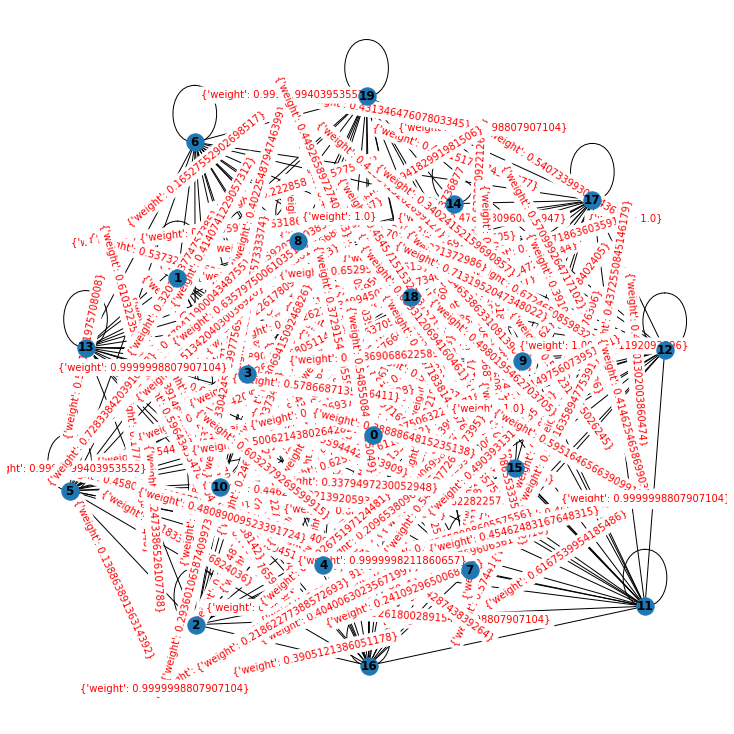

In [4]:
def draw_graphs(sim_matrix):
    nx_graph = nx.from_numpy_array(sim_matrix)
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(nx_graph)
    nx.draw(nx_graph, with_labels=True, font_weight='bold')
    nx.draw_networkx_edge_labels(nx_graph,pos,font_color='red')
    plt.show()
    
draw_graphs(data['SimMatrix'][1])

In [5]:
data

,Unnamed: 0,company,date,title,content,sentences,tokenized_sentences,SentenceEmbedding,SimMatrix,score,summary
0,0,By Reuters,"<span>Aug 19, 2018 03:08PM ET</span>","With recession looming, Argentina's Macri lack...",By Hugh Bronstein\nBUENOS AIRES (Reuters) - Wi...,[By Hugh Bronstein\nBUENOS AIRES (Reuters) - W...,"[[hugh, bronstein, buenos, aires, reuters, int...","[[-0.01881426, 0.0053419895, -0.016177956, 0.0...","[[1.0000001192092896, 0.8000097870826721, 0.72...","{0: 0.025604973523980768, 1: 0.026536713474408...",Argentina's central bank hiked interest rates ...
1,1,By Reuters,"<span>Aug 19, 2018 02:20PM ET</span>","Greece under tight watch post-bailout, can be ...",By George Georgiopoulos\nATHENS (Reuters) - Gr...,[By George Georgiopoulos\nATHENS (Reuters) - G...,"[[george, georgiopoulos, athens, reuters, gree...","[[-0.016974207, 0.009708023, 0.007609666, 0.03...","[[0.9999998807907104, 0.7317458391189575, 0.63...","{0: 0.0583613282606816, 1: 0.05351509657464281...",By George Georgiopoulos\nATHENS (Reuters) - Gr...
2,2,By Bloomberg,"<span>Aug 19, 2018 06:50AM ET</span>",Trade War Won’t Dent China’s GDP,(Bloomberg Opinion) -- Analysts are trying urg...,[(Bloomberg Opinion) -- Analysts are trying ur...,"[[bloomberg, opinion, analysts, trying, urgent...","[[-0.039504163, 0.0052812, 0.03121076, 0.05072...","[[1.0, 0.5933828353881836, 0.6079122424125671,...","{0: 0.032374202308469435, 1: 0.033542420637213...","If, as is widely acknowledged even by the gove..."
3,3,By Investing.com,"<span>Aug 19, 2018 05:57AM ET</span>",Economic Calendar - Top 5 Things To Watch This...,Investing.com - Trade talks between the United...,[Investing.com - Trade talks between the Unite...,"[[investingcom, trade, talks, united, states, ...","[[-0.025408262, 0.021058518, 0.03049918, 0.061...","[[1.0, 0.7658512592315674, 0.6884312033653259,...","{0: 0.029360932506722677, 1: 0.027587923845583...","On the data front, a report on U.S. durable go..."
4,4,By Bloomberg,"<span>Aug 19, 2018 04:30AM ET</span>",Tariffs Will Hurt U.S. More Than Rest of World...,(Bloomberg) -- The U.S. economy will be hit ma...,[(Bloomberg) -- The U.S. economy will be hit m...,"[[bloomberg, us, economy, hit, many, times, ha...","[[-0.011106198, -0.026156165, -0.00495136, 0.0...","[[0.9999999403953552, 0.045549336820840836, 0....","{0: 0.08370942334208666, 1: 0.0355182278416883...","Soren Skou, who runs the world’s biggest shipp..."
...,...,...,...,...,...,...,...,...,...,...,...
876,876,By Reuters,"<span>Jul 10, 2018 04:53AM ET</span>",China raises tariff rates for some U.S. optica...,BEIJING (Reuters) - China's commerce ministry ...,[BEIJING (Reuters) - China's commerce ministry...,"[[beijing, reuters, china, commerce, ministry,...","[[-0.036203574, 0.028883401, -0.010354614, 0.0...","[[0.9999999403953552, 0.6278504133224487, 0.60...","{0: 0.33612012931212254, 1: 0.3331323631145509...",BEIJING (Reuters) - China's commerce ministry ...
877,877,By Reuters,"<span>Jul 10, 2018 04:50AM ET</span>",Cuba to prune back private sector as new rules...,HAVANA (Reuters) - Cuba will restrict business...,[HAVANA (Reuters) - Cuba will restrict busines...,"[[havana, reuters, cuba, restrict, business, l...","[[-0.04613678, 0.00032354431, -0.0074015493, 0...","[[1.0, 0.6956280469894409, 0.7812337279319763,...","{0: 0.06354189925804161, 1: 0.0569982584168319...",HAVANA (Reuters) - Cuba will restrict business...
878,878,By Reuters,"<span>Jul 10, 2018 03:31AM ET</span>",Switzerland launches WTO action over U.S. stee...,GENEVA (Reuters) - Switzerland has launched a ...,[GENEVA (Reuters) - Switzerland has launched a...,"[[geneva, reuters, switzerland, launched, comp...","[[-0.018769467, 0.0022256174, -0.004874072, 0....","[[0.9999999403953552, 0.8050974607467651, 0.67...","{0: 0.2588418009717443, 1: 0.24505047877799777...",GENEVA (Reuters) - Switzerland has launched a ...
879,879,By Reuters,"<span>Jul 10, 2018 02:50AM ET</span>",Europe needs pan-European banks: JPMorgan's Di...,"MILAN (Reuters) - Eur